In [2]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [3]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

# 중소기업

In [4]:
sme_cursor = remote.cursor(buffered=True)
sme_cursor.execute("""
               
    SELECT type, tech_name, count(tech_name) cnt from
(select type, re.recruit_id, tech_name
from tech_info te, essential_tech es, recruit_info re, company_info co, comp_type ct
where es.recruit_id = re.recruit_id and
es.tech_id = te.tech_id and
re.comp_name_id = comp_id and
ct.comp_type_id = co.comp_type_id) i
GROUP by type, tech_name
HAVING type = '중소기업'
ORDER BY cnt DESC 
limit 3

""")
sme_result = sme_cursor.fetchall()

sme_df = pd.DataFrame(sme_result)

# df.columns = ["경력", "평균연봉(만)"]

sme_df

,0,1,2
0,중소기업,C++,47
1,중소기업,Python,31
2,중소기업,C,29


In [28]:
sme_df.columns = ["기업분류", "기술", "수"]

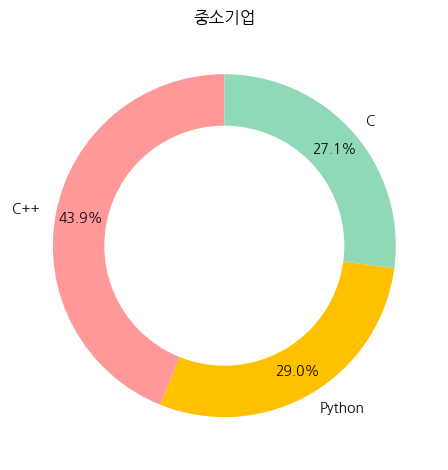

In [30]:
labels = sme_df["기술"]
sizes = sme_df["수"]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(labels)]  # 색상 지정

# 도넛 파이 차트 생성
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# 도넛 중앙에 빈 공간 추가
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 제목 추가
ax.set_title("중소기업")

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 스타트업

In [5]:
start_cursor = remote.cursor(buffered=True)
start_cursor.execute("""
               
    SELECT type, tech_name, count(tech_name) cnt from
(select type, re.recruit_id, tech_name
from tech_info te, essential_tech es, recruit_info re, company_info co, comp_type ct
where es.recruit_id = re.recruit_id and
es.tech_id = te.tech_id and
re.comp_name_id = comp_id and
ct.comp_type_id = co.comp_type_id) i
GROUP by type, tech_name
HAVING type = '스타트업'
ORDER BY cnt DESC 
limit 3

""")
start_result = start_cursor.fetchall()

start_df = pd.DataFrame(start_result)

# df.columns = ["경력", "평균연봉(만)"]

start_df

,0,1,2
0,스타트업,C++,5
1,스타트업,C#,3
2,스타트업,C,3


In [25]:
start_df.columns = ["기업분류", "기술", "수"]

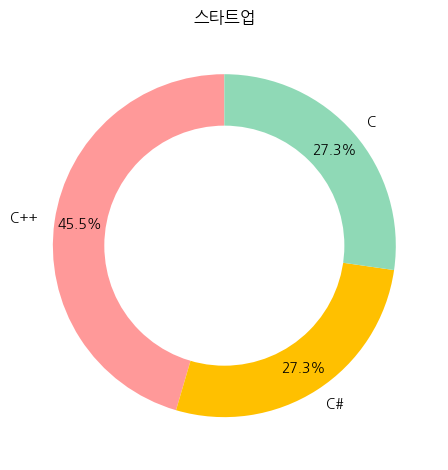

In [27]:
labels = start_df["기술"]
sizes = start_df["수"]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(labels)]  # 색상 지정

# 도넛 파이 차트 생성
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# 도넛 중앙에 빈 공간 추가
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 제목 추가
ax.set_title("스타트업")

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 벤처기업

In [6]:
venture_cursor = remote.cursor(buffered=True)
venture_cursor.execute("""
               
    SELECT type, tech_name, count(tech_name) cnt from
(select type, re.recruit_id, tech_name
from tech_info te, essential_tech es, recruit_info re, company_info co, comp_type ct
where es.recruit_id = re.recruit_id and
es.tech_id = te.tech_id and
re.comp_name_id = comp_id and
ct.comp_type_id = co.comp_type_id) i
GROUP by type, tech_name
HAVING type = '벤처기업'
ORDER BY cnt DESC 
limit 3

""")
venture_result = venture_cursor.fetchall()

venture_df = pd.DataFrame(venture_result)

# df.columns = ["경력", "평균연봉(만)"]

venture_df

,0,1,2
0,벤처기업,C++,30
1,벤처기업,Python,16
2,벤처기업,ROS,14


In [22]:
venture_df.columns = ["기업분류", "기술", "수"]

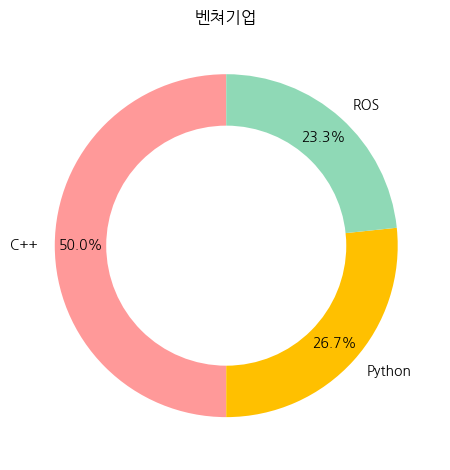

In [24]:
labels = venture_df["기술"]
sizes = venture_df["수"]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(labels)]  # 색상 지정

# 도넛 파이 차트 생성
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# 도넛 중앙에 빈 공간 추가
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 제목 추가
ax.set_title("벤쳐기업")

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 강소기업

In [8]:
strong_cursor = remote.cursor(buffered=True)
strong_cursor.execute("""
               
    SELECT type, tech_name, count(tech_name) cnt from
(select type, re.recruit_id, tech_name
from tech_info te, essential_tech es, recruit_info re, company_info co, comp_type ct
where es.recruit_id = re.recruit_id and
es.tech_id = te.tech_id and
re.comp_name_id = comp_id and
ct.comp_type_id = co.comp_type_id) i
GROUP by type, tech_name
HAVING type = '강소기업'
ORDER BY cnt DESC 
limit 3

""")
strong_result = strong_cursor.fetchall()

strong_df = pd.DataFrame(strong_result)

# df.columns = ["경력", "평균연봉(만)"]

strong_df

,0,1,2
0,강소기업,C#,9
1,강소기업,C++,6
2,강소기업,C,6


In [19]:
strong_df.columns = ["기업분류", "기술", "수"]

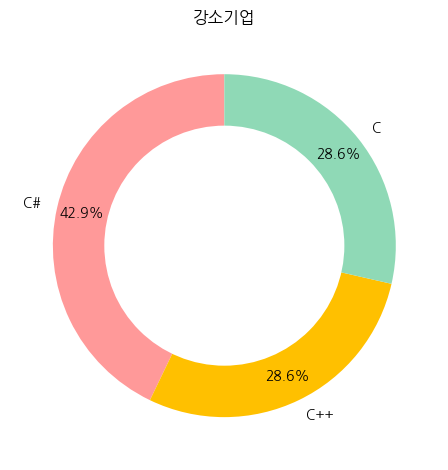

In [21]:
labels = strong_df["기술"]
sizes = strong_df["수"]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(labels)]  # 색상 지정

# 도넛 파이 차트 생성
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# 도넛 중앙에 빈 공간 추가
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 제목 추가
ax.set_title("강소기업")

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 중견기업

In [9]:
middle_cursor = remote.cursor(buffered=True)
middle_cursor.execute("""
               
    SELECT type, tech_name, count(tech_name) cnt from
(select type, re.recruit_id, tech_name
from tech_info te, essential_tech es, recruit_info re, company_info co, comp_type ct
where es.recruit_id = re.recruit_id and
es.tech_id = te.tech_id and
re.comp_name_id = comp_id and
ct.comp_type_id = co.comp_type_id) i
GROUP by type, tech_name
HAVING type = '중견기업'
ORDER BY cnt DESC 
limit 3

""")
middle_result = middle_cursor.fetchall()

middle_df = pd.DataFrame(middle_result)

# df.columns = ["경력", "평균연봉(만)"]

middle_df

,0,1,2
0,중견기업,C++,7
1,중견기업,C,5
2,중견기업,Python,4


In [16]:
middle_df.columns = ["기업분류", "기술", "수"]

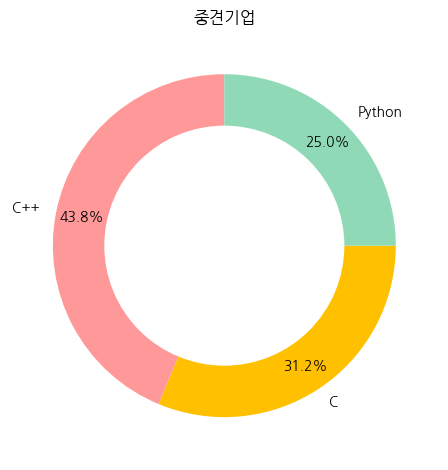

In [18]:
labels = middle_df["기술"]
sizes = middle_df["수"]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(labels)]  # 색상 지정

# 도넛 파이 차트 생성
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# 도넛 중앙에 빈 공간 추가
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 제목 추가
ax.set_title("중견기업")

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 대기업

In [10]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
               
    SELECT type, tech_name, count(tech_name) cnt from
(select type, re.recruit_id, tech_name
from tech_info te, essential_tech es, recruit_info re, company_info co, comp_type ct
where es.recruit_id = re.recruit_id and
es.tech_id = te.tech_id and
re.comp_name_id = comp_id and
ct.comp_type_id = co.comp_type_id) i
GROUP by type, tech_name
HAVING type = '대기업'
ORDER BY cnt DESC 
limit 3

""")
result = cursor.fetchall()

df = pd.DataFrame(result)

# df.columns = ["경력", "평균연봉(만)"]

df

,0,1,2
0,대기업,C#,2
1,대기업,MCU,1
2,대기업,C,1


In [11]:
df.columns=["기업분류", "기술", "수"]



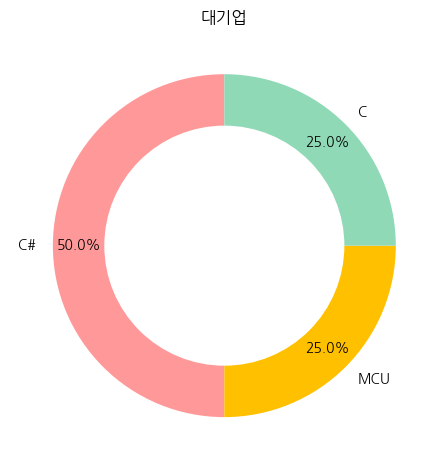

In [15]:
import matplotlib.pyplot as plt

# 기업 분류별 기술 수 합계를 계산

labels = df["기술"]
sizes = df["수"]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(labels)]  # 색상 지정

# 도넛 파이 차트 생성
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# 도넛 중앙에 빈 공간 추가
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 제목 추가
ax.set_title("대기업")

# 레이아웃 조정
plt.tight_layout()
plt.show()
